# Working with sea surface temperature (SST) and Sea Ice from the NEMO model

This is an attempt to plot irregular data from the NEMO ocean grid with 2-d lat and lon coordinates.

I was inspired to try these by what looks like an interesting resource for Oceanographers - the python4oceanographers blog (https://ocefpaf.github.io/python4oceanographers/) and especially this article on Iris: https://ocefpaf.github.io/python4oceanographers/blog/2014/12/29/iris_ocean_models/.

-- by Tony Phillips

In [1]:
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import iris.analysis.cartography
from iris.time import PartialDateTime

import numpy as np
import numpy.ma as ma

import cartopy.crs as ccrs
import cartopy.feature as cfe

# print images within notebook
% matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri

from scipy.spatial import Delaunay

# Ignore warning messages for this tutorial (usually we don't do this!)
import warnings
warnings.filterwarnings('ignore')

# Read in SST data

In [2]:
iris.FUTURE.cell_datetime_objects = True

# read SST for CNRM-CM5 historical ensemble member 1 for September 1979-2005
start = PartialDateTime(year=2000)
end = PartialDateTime(year=2005)
months = [9]

t_range_con = iris.Constraint(time=lambda cell: start <= cell.point <= end)
t_months_con = iris.Constraint(time=lambda cell: cell.point.month in months)

filename = 'Data/CNRM-CM5_sst.nc'
sst = iris.load_cube(filename, t_range_con & t_months_con)

print(sst)

sea_surface_temperature                    (time: 6; cell index along second dimension: 292; cell index along first dimension: 362)
     Dimension coordinates:
          time                                  x                                     -                                      -
          cell index along second dimension     -                                     x                                      -
          cell index along first dimension      -                                     -                                      x
     Auxiliary coordinates:
          latitude                              -                                     x                                      x
          longitude                             -                                     x                                      x
     Attributes:
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CNRM-CM5_histor

# Plot SSTs

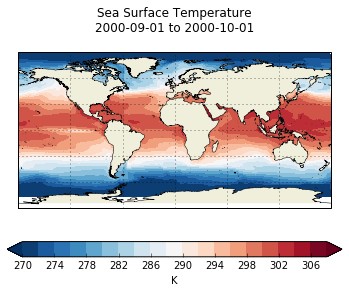

In [3]:
fig = plt.figure()

ax = plt.axes( projection=ccrs.PlateCarree() )
ax.set_global()

cube = sst[0]
data = cube.data[~cube.data.mask].flatten()
lon = cube.coord(axis='X').points[~cube.data.mask].flatten()
lon[np.where(lon >= 180)[0]] -= 360.0
lat = cube.coord(axis='Y').points[~cube.data.mask].flatten()
contours = ax.tricontourf(lon, lat, data, np.arange( 270, 310, 2), extend='both', cmap='RdBu_r')
cbar = plt.colorbar(contours, orientation='horizontal')
cbar.set_label(cube.units)

ax.gridlines()
ax.add_feature( cfe.NaturalEarthFeature( 'physical', 'coastline', '50m', linewidth=0.5, 
                                                edgecolor='k', facecolor=cfe.COLORS['land'] ) )

# work out date or range of dates for plot title
tc = cube.coord('time')
tu = tc.units
tu = tc.units
if tc.has_bounds():
    times = tu.num2date(tc.bounds[0])
    time_str = '{time1:%Y-%m-%d} to {time2:%Y-%m-%d}'.format(time1=times[0], time2=times[1])
else:
    time = tu.num2date(tc.points[0])
    time_str = '{time:%Y-%m-%d}'.format(time=time)

# plot name
cube_name_str = cube.name().replace('_', ' ').title()
plt.title(cube_name_str + '\n' + time_str + '\n')

plt.show()


# Similarly, lets read in and plot Sea Ice data

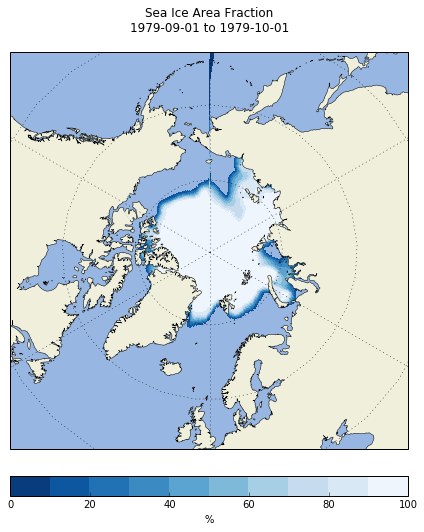

In [5]:
iris.FUTURE.cell_datetime_objects = True

# read sea ice for CNRM-CM5 historical ensemble member 1 for September 1979-2005
start = PartialDateTime(year=1979)
end = PartialDateTime(year=2005)
months = [9]

t_range_con = iris.Constraint(time=lambda cell: start <= cell.point <= end)
t_months_con = iris.Constraint(time=lambda cell: cell.point.month in months)

filename = 'Data/CNRM-CM5_sea_ice.nc'
sic = iris.load_cube(filename, t_range_con & t_months_con)

fig = plt.figure(figsize=(6, 8), tight_layout=True)

ax = plt.axes( projection=ccrs.NorthPolarStereo() )
ax.set_extent((-180.0, 180.0, 50.0, 90.0), crs=ccrs.PlateCarree())

cube = sic[0]
data = cube.data[~cube.data.mask].flatten()
lon = cube.coord(axis='X').points[~cube.data.mask].flatten()
lon[np.where(lon >= 180)[0]] -= 360.0
lat = cube.coord(axis='Y').points[~cube.data.mask].flatten()
contours = ax.tricontourf(lon, lat, data, np.arange( 0, 110, 10), cmap='Blues_r', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contours, orientation='horizontal', pad=0.05)
cbar.set_label(cube.units)

ax.gridlines()
ax.add_feature( cfe.NaturalEarthFeature( 'physical', 'coastline', '50m', linewidth=0.5, 
                                                edgecolor='k', facecolor=cfe.COLORS['land'] ) )

ax.add_feature( cfe.NaturalEarthFeature( 'physical', 'ocean', '50m', facecolor=cfe.COLORS['water'], zorder=0 ) )


# work out date or range of dates for plot title
tc = cube.coord('time')
tu = tc.units
tu = tc.units
if tc.has_bounds():
    times = tu.num2date(tc.bounds[0])
    time_str = '{time1:%Y-%m-%d} to {time2:%Y-%m-%d}'.format(time1=times[0], time2=times[1])
else:
    time = tu.num2date(tc.points[0])
    time_str = '{time:%Y-%m-%d}'.format(time=time)

# plot name
cube_name_str = cube.name().replace('_', ' ').title()
plt.title(cube_name_str + '\n' + time_str + '\n')

plt.show()